In [1]:
from platform import python_version

print(python_version())

3.8.0


In [2]:
import sqlalchemy as sal

endpoint = "capstone.clihskgj8i7s.us-west-2.rds.amazonaws.com"
user="group3"
db="db1"

# endpoint = "capstone.clihskgj8i7s.us-west-2.rds.amazonaws.com"
# user="group3"
# db="db1"
pw="3qLXGOaxMSoqYfj3yAOY"

engine = sal.create_engine('postgresql://%s:%s@%s/%s' % (user, pw, endpoint, db))

In [3]:
import pandas as pd
#engine = sal.create_engine('postgresql://%s:%s@%s/%s' % (user, pw, endpoint, db))

query="""
select to_char(timestamp,'YYYYMM') tmonth, to_char(timestamp,'HH24:MI:SS') ttime, avg(avg_speed) aspeed, avg(total_flow) aflow, sum(total_flow) sflow
from traffic, pemslocs
where traffic.station = pemslocs.sid
and county = '73' and district = '11'
and to_char(timestamp,'YYYY-MM-DD') > '2020-01-20'
and to_char(timestamp,'YYYY') = '2020'
group by to_char(timestamp,'YYYYMM'),to_char(timestamp,'HH24:MI:SS');
"""

#where station = 400001
#where station = 400717

traffic=pd.read_sql(query, engine)

print(traffic.shape)
traffic.head() 

SyntaxError: invalid syntax (<ipython-input-3-20dbaa8c6045>, line 1)

In [3]:
describe_query = '''SELECT
    table_schema || '.' || table_name as show_tables
FROM
    information_schema.tables
WHERE
    table_type = 'BASE TABLE'
AND
    table_schema NOT IN ('pg_catalog', 'information_schema');'''

table_description = ''' select column_name, data_type, character_maximum_length
 from INFORMATION_SCHEMA.COLUMNS where table_name ='pemslocs';'''
q = engine.execute(describe_query).fetchall()
q

[('public.traffic_bay',),
 ('public.covidlocs',),
 ('public.traffic_sd_day',),
 ('public.traffic_bay_day',),
 ('public.hospitals',),
 ('public.traffic',),
 ('public.covidcases',),
 ('public.pemslocs',),
 ('public.usdot',)]

In [3]:
list_views = '''
select schemaname as schema_name,
       matviewname as view_name,
       matviewowner as owner,
       ispopulated as is_populated,
       definition
from pg_matviews
order by schema_name,
         view_name;
'''

q = engine.execute(list_views).fetchall()
q

[('public', 'traffic_covid_bay_day', 'group3', True, ' SELECT recordtable.record_date,\n    sum(recordtable.cumm_new_cases) AS cumm_new_cases,\n    sum(recordtable.cumm_new_deaths) AS cumm_new_deaths,\n  ... (2617 characters truncated) ...      GROUP BY covidcases.rdate, ("substring"(((covidlocs.fips)::character varying(6))::text, 2, 3))) recordtable\n  GROUP BY recordtable.record_date;'),
 ('public', 'traffic_covid_both', 'group3', True, ' SELECT recordtable.record_date,\n    sum(recordtable.cumm_new_cases) AS cumm_new_cases,\n    sum(recordtable.cumm_new_deaths) AS cumm_new_deaths,\n  ... (2617 characters truncated) ...      GROUP BY covidcases.rdate, ("substring"(((covidlocs.fips)::character varying(6))::text, 2, 3))) recordtable\n  GROUP BY recordtable.record_date;'),
 ('public', 'traffic_covid_sd_day', 'group3', True, ' SELECT recordtable.record_date,\n    sum(recordtable.cumm_new_cases) AS cumm_new_cases,\n    sum(recordtable.cumm_new_deaths) AS cumm_new_deaths,\n  ... (2667 char

In [9]:
engine.execute("select count(*) from traffic_joined_covid").fetchall()

[(16673584,)]

In [8]:
engine.execute("select count(*) from traffic_bay where timestamp>='01-01-2020' and timestamp<='06-30-2020'").fetchall()

[(16673584,)]

In [3]:
table_description = ''' select column_name, data_type, character_maximum_length
 from INFORMATION_SCHEMA.COLUMNS where table_name ='traffic_bay';'''
q = engine.execute(table_description)
q.fetchall()

[('timestamp', 'timestamp without time zone', None),
 ('station', 'integer', None),
 ('samples', 'smallint', None),
 ('pct_observed', 'smallint', None),
 ('total_flow', 'integer', None),
 ('avg_occupancy', 'double precision', None),
 ('avg_speed', 'double precision', None),
 ('traffic_date', 'date', None)]

In [4]:
describe_query = '''SELECT
    table_schema || '.' || table_name as show_tables
FROM
    information_schema.tables
WHERE
    table_type = 'BASE TABLE'
AND
    table_schema NOT IN ('pg_catalog', 'information_schema');'''

table_description = ''' select column_name, data_type, character_maximum_length
 from INFORMATION_SCHEMA.COLUMNS where table_name ='pemslocs';'''
q = engine.execute(table_description).fetchall()
q

[('sid', 'integer', None),
 ('fwy', 'smallint', None),
 ('latitude', 'double precision', None),
 ('longitude', 'double precision', None),
 ('length', 'double precision', None),
 ('lanes', 'smallint', None),
 ('district', 'smallint', None),
 ('county', 'smallint', None),
 ('city', 'integer', None),
 ('abs_pm', 'double precision', None),
 ('direc', 'character', 1),
 ('state_pm', 'character varying', None),
 ('stype', 'character varying', 2),
 ('name', 'character varying', None)]

In [5]:
county_description = ''' select district,count(county)
 from  pemslocs group by district'''
q = engine.execute(county_description)
q.fetchall()

[(11, 1629),
 (8, 2272),
 (10, 1351),
 (7, 5023),
 (5, 505),
 (4, 4466),
 (6, 779),
 (12, 2834),
 (3, 1544)]

In [6]:
county_description = '''select distinct(district) from traffic_bay inner join pemslocs on station=sid'''
q = engine.execute(county_description)
q.fetchall()

[(4,)]

In [33]:
table_description = ''' select column_name, data_type, character_maximum_length
 from INFORMATION_SCHEMA.COLUMNS where table_name ='traffic_bay';'''
q = engine.execute(table_description)
q.fetchall()

[('timestamp', 'timestamp without time zone', None),
 ('station', 'integer', None),
 ('samples', 'smallint', None),
 ('pct_observed', 'smallint', None),
 ('total_flow', 'integer', None),
 ('avg_occupancy', 'double precision', None),
 ('avg_speed', 'double precision', None),
 ('traffic_date', 'date', None)]

In [57]:
table_description = ''' select column_name, data_type, character_maximum_length
 from INFORMATION_SCHEMA.COLUMNS where table_name ='traffic_train';'''
q = engine.execute(table_description)
q.fetchall()

[]

In [34]:
table_description = '''select * from INFORMATION_SCHEMA.COLUMNS where table_name ='traffic_bay';'''
q = engine.execute(table_description)
q.fetchall()

[('timestamp', 'timestamp without time zone', None),
 ('station', 'integer', None),
 ('samples', 'smallint', None),
 ('pct_observed', 'smallint', None),
 ('total_flow', 'integer', None),
 ('avg_occupancy', 'double precision', None),
 ('avg_speed', 'double precision', None),
 ('traffic_date', 'date', None)]

### Covid_data per county

In [8]:
table_description = ''' select column_name, data_type, character_maximum_length
 from INFORMATION_SCHEMA.COLUMNS where table_name ='covidlocs';'''
engine.execute(table_description).fetchall()

[('uid', 'integer', None),
 ('fips', 'double precision', None),
 ('latitude', 'double precision', None),
 ('longitude', 'double precision', None),
 ('population', 'double precision', None),
 ('admin2', 'text', None),
 ('province_state', 'text', None),
 ('country_region', 'text', None),
 ('iso2', 'character', 4),
 ('iso3', 'character', 3),
 ('code3', 'character', 4),
 ('combined_key', 'character varying', None)]

In [4]:
join = '''select sum(ncas),combined_key,rdate from covidcases left join covidlocs on cloc = uid group by combined_key,rdate'''
covid_data = engine.execute(join).fetchall()
covid_data

[(0, 'Abbeville, South Carolina, US', datetime.date(2020, 1, 22)),
 (0, 'Abbeville, South Carolina, US', datetime.date(2020, 1, 23)),
 (0, 'Abbeville, South Carolina, US', datetime.date(2020, 1, 24)),
 (0, 'Abbeville, South Carolina, US', datetime.date(2020, 1, 25)),
 (0, 'Abbeville, South Carolina, US', datetime.date(2020, 1, 26)),
 (0, 'Abbeville, South Carolina, US', datetime.date(2020, 1, 27)),
 (0, 'Abbeville, South Carolina, US', datetime.date(2020, 1, 28)),
 (0, 'Abbeville, South Carolina, US', datetime.date(2020, 1, 29)),
 (0, 'Abbeville, South Carolina, US', datetime.date(2020, 1, 30)),
 (0, 'Abbeville, South Carolina, US', datetime.date(2020, 1, 31)),
 (0, 'Abbeville, South Carolina, US', datetime.date(2020, 2, 1)),
 (0, 'Abbeville, South Carolina, US', datetime.date(2020, 2, 2)),
 (0, 'Abbeville, South Carolina, US', datetime.date(2020, 2, 3)),
 (0, 'Abbeville, South Carolina, US', datetime.date(2020, 2, 4)),
 (0, 'Abbeville, South Carolina, US', datetime.date(2020, 2, 5)),


In [6]:
join = '''select * from covidcases left join covidlocs on cloc = uid limit 5'''
engine.execute(join).fetchall()

[(2667693, 16, datetime.date(2020, 1, 22), 0, 'C', 16, 'AS  ', 'ASM', '16  ', 60.0, None, 'American Samoa', 'US', -14.270999999999999, -170.132, 'American Samoa, US', 55641.0),
 (2667694, 16, datetime.date(2020, 1, 23), 0, 'C', 16, 'AS  ', 'ASM', '16  ', 60.0, None, 'American Samoa', 'US', -14.270999999999999, -170.132, 'American Samoa, US', 55641.0),
 (2667695, 16, datetime.date(2020, 1, 24), 0, 'C', 16, 'AS  ', 'ASM', '16  ', 60.0, None, 'American Samoa', 'US', -14.270999999999999, -170.132, 'American Samoa, US', 55641.0),
 (2667696, 16, datetime.date(2020, 1, 25), 0, 'C', 16, 'AS  ', 'ASM', '16  ', 60.0, None, 'American Samoa', 'US', -14.270999999999999, -170.132, 'American Samoa, US', 55641.0),
 (2667697, 16, datetime.date(2020, 1, 26), 0, 'C', 16, 'AS  ', 'ASM', '16  ', 60.0, None, 'American Samoa', 'US', -14.270999999999999, -170.132, 'American Samoa, US', 55641.0)]

In [10]:
get_counties = ''' select distinct county from traffic_bay inner join pemslocs on station=sid limit 5 '''
engine.execute(get_counties).fetchall()

[(85,)]

In [28]:
get_stations = '''select distinct county from traffic left join pemslocs on station=sid where timestamp >= '01-01-2020' and timestamp <= '06-30-2020' '''
engine.execute(get_stations).fetchall()

# get_stations = '''select count(distinct station) from traffic_bay  inner join pemslocs on station=sid where timestamp >= '01-01-2020' and timestamp <= '06-30-2020' and county = 85'''
# engine.execute(get_stations).fetchall()

[(73,)]

In [11]:
view = '''select * from pg_matviews where matviewname = 'traffic_train';'''
engine.execute(view).fetchall()

[('public', 'traffic_train', 'group3', None, False, True, ' SELECT traffic_bay."timestamp",\n    traffic_bay.station,\n    traffic_bay.samples,\n    traffic_bay.pct_observed,\n    traffic_bay.total_flow,\n    ... (105 characters truncated) ... tamp" > \'2020-01-01 00:00:00\'::timestamp without time zone) AND (traffic_bay."timestamp" <= \'2020-06-30 00:00:00\'::timestamp without time zone));')]

In [42]:
view = '''select distinct district from traffic left join pemslocs on station=sid where timestamp >= '01-01-2020' and timestamp <= '06-30-2020' '''
engine.execute(view).fetchall()

[(11,)]

In [4]:
view = '''select distinct sid from pemslocs inner join traffic on sid = station where timestamp >= '01-01-2020' and timestamp <= '06-30-2020' '''
available_stations = engine.execute(view).fetchall()

In [19]:
query = '''select distinct station from traffic_train'''
station_list = engine.execute(query).fetchall()

In [25]:
data_2020 = {each[0] for each in station_list}
stations_available_2020 = {each[0] for each in available_stations} # Pems locs stations

In [31]:
#stations_available_2020
data_2020

{400001,
 400017,
 400030,
 400040,
 400045,
 400052,
 400057,
 400059,
 400065,
 400069,
 400073,
 400084,
 400085,
 400088,
 400096,
 400097,
 400100,
 400104,
 400109,
 400122,
 400147,
 400148,
 400149,
 400158,
 400160,
 400168,
 400172,
 400174,
 400178,
 400185,
 400201,
 400206,
 400209,
 400213,
 400221,
 400222,
 400227,
 400236,
 400238,
 400240,
 400246,
 400253,
 400257,
 400258,
 400268,
 400274,
 400278,
 400280,
 400292,
 400296,
 400298,
 400330,
 400336,
 400343,
 400353,
 400372,
 400394,
 400400,
 400414,
 400418,
 400429,
 400435,
 400436,
 400440,
 400449,
 400457,
 400461,
 400464,
 400479,
 400485,
 400499,
 400507,
 400508,
 400514,
 400519,
 400528,
 400545,
 400560,
 400563,
 400567,
 400581,
 400582,
 400586,
 400637,
 400643,
 400648,
 400649,
 400654,
 400664,
 400665,
 400668,
 400673,
 400677,
 400687,
 400688,
 400690,
 400700,
 400709,
 400713,
 400714,
 400715,
 400717,
 400723,
 400743,
 400750,
 400760,
 400772,
 400790,
 400792,
 400794,
 400799,
 

In [38]:
view = '''select distinct county from pemslocs inner join traffic_train on sid = station '''
engine.execute(view).fetchall()

[(85,)]

In [42]:
view = '''select count(distinct sid) from pemslocs inner join traffic_bay on sid = station where timestamp >= '01-01-2020' and timestamp <= '06-30-2020' '''
engine.execute(view).fetchall()

[(320,)]

In [77]:
covid_data = '''
CREATE MATERIALIZED VIEW traffic_covid_both

AS

SELECT recordtable.record_date,
    sum(recordtable.cumm_new_cases) AS cumm_new_cases,
    sum(recordtable.cumm_new_deaths) AS cumm_new_deaths,
    sum(recordtable.cumm_new_cases) - lag(sum(recordtable.cumm_new_cases), 1) OVER (ORDER BY recordtable.record_date) AS new_cases,
    sum(recordtable.cumm_new_deaths) - lag(sum(recordtable.cumm_new_deaths), 1) OVER (ORDER BY recordtable.record_date) AS new_deaths,
    sum(recordtable.tot_total_flow) AS tot_total_flow,
    sum(recordtable.avg_total_flow) AS avg_total_flow,
    sum(recordtable.avg_avg_speed) AS avg_avg_speed
   FROM ( SELECT date(traffic_bay."timestamp") AS record_date,
            lpad(pemslocs.county::text, 3, '0'::text) AS county,
            0 AS cumm_new_cases,
            0 AS cumm_new_deaths,
            sum(traffic_bay.total_flow) AS tot_total_flow,
            avg(traffic_bay.total_flow) AS avg_total_flow,
            avg(traffic_bay.avg_speed) AS avg_avg_speed
           FROM traffic_bay,
            pemslocs
          WHERE traffic_bay.station = pemslocs.sid AND date(traffic_bay."timestamp") >= '2020-01-01'::date AND lpad(pemslocs.county::text, 3, '0'::text) = '085'::text
          GROUP BY (date(traffic_bay."timestamp")), (lpad(pemslocs.county::text, 3, '0'::text))
        UNION
         SELECT covidcases.rdate AS record_date,
            "substring"(covidlocs.fips::character varying(6)::text, 2, 3) AS county,
            sum(covidcases.ncas) AS cumm_new_cases,
            0 AS cumm_new_deaths,
            0 AS tot_total_flow,
            0 AS avg_total_flow,
            0 AS avg_avg_speed
           FROM covidcases,
            covidlocs
          WHERE covidlocs.uid = covidcases.cloc AND covidlocs.province_state = 'California'::text AND "substring"(covidlocs.fips::character varying(6)::text, 2, 3) = '085'::text AND covidcases.ctype = 'C'::bpchar AND covidcases.rdate >= '2020-01-01'::date
          GROUP BY covidcases.rdate, ("substring"(covidlocs.fips::character varying(6)::text, 2, 3))
        UNION
         SELECT covidcases.rdate AS record_date,
            "substring"(covidlocs.fips::character varying(6)::text, 2, 3) AS county,
            0 AS cumm_new_cases,
            sum(covidcases.ncas) AS cumm_new_deaths,
            0 AS tot_total_flow,
            0 AS avg_total_flow,
            0 AS avg_avg_speed
           FROM covidcases,
            covidlocs
          WHERE covidlocs.uid = covidcases.cloc AND covidlocs.province_state = 'California'::text AND "substring"(covidlocs.fips::character varying(6)::text, 2, 3) = '085'::text AND covidcases.ctype = 'D'::bpchar AND covidcases.rdate >= '2020-01-01'::date
          GROUP BY covidcases.rdate, ("substring"(covidlocs.fips::character varying(6)::text, 2, 3))) recordtable
  GROUP BY recordtable.record_date;
'''

In [78]:
engine.execute(covid_data)

In [79]:
engine.execute('select * from traffic_covid_both limit 5').fetchall()

[(datetime.date(2020, 1, 1), Decimal('0'), Decimal('0'), None, None, Decimal('20436509'), Decimal('221.7503146701388889'), 61.97499023437565),
 (datetime.date(2020, 1, 2), Decimal('0'), Decimal('0'), Decimal('0'), Decimal('0'), Decimal('20738294'), Decimal('225.0248914930555556'), 62.928858506944735),
 (datetime.date(2020, 1, 3), Decimal('0'), Decimal('0'), Decimal('0'), Decimal('0'), Decimal('20799427'), Decimal('225.6882269965277778'), 64.034845920139),
 (datetime.date(2020, 1, 4), Decimal('0'), Decimal('0'), Decimal('0'), Decimal('0'), Decimal('18010867'), Decimal('195.4304144965277778'), 65.86789605034785),
 (datetime.date(2020, 1, 5), Decimal('0'), Decimal('0'), Decimal('0'), Decimal('0'), Decimal('15881889'), Decimal('172.8772695606740105'), 66.1623873383552)]

In [46]:
q = engine.execute('''select * from traffic_covid_bay_day inner join ''')
q.fetchall()

[(datetime.date(2020, 1, 1), Decimal('0'), Decimal('0'), None, None, Decimal('20436509'), Decimal('221.7503146701388889'), 61.97499023437498)]

In [48]:
table_description = ''' select column_name, data_type, character_maximum_length
 from INFORMATION_SCHEMA.COLUMNS where table_name ='traffic_bay_day';'''
q = engine.execute(table_description)
q.fetchall()

[('date', 'date', None),
 ('tot_total_flow', 'bigint', None),
 ('avg_total_flow', 'numeric', None),
 ('avg_avg_speed', 'double precision', None),
 ('county', 'text', None),
 ('county_name', 'text', None)]

In [69]:
table_description = ''' select column_name, data_type, character_maximum_length
 from INFORMATION_SCHEMA.COLUMNS where table_name ='traffic_bay_day';'''
q = engine.execute(table_description)
q.fetchall()

[('date', 'date', None),
 ('tot_total_flow', 'bigint', None),
 ('avg_total_flow', 'numeric', None),
 ('avg_avg_speed', 'double precision', None),
 ('county', 'text', None),
 ('county_name', 'text', None)]

In [56]:
engine.execute('''select  from traffic_bay_day where date >= '01-01-2020' and date <= '06-30-2020' ''').fetchall()

[(datetime.date(2020, 1, 1), '085', 'Lonoke', 61.974990234375, 20436509),
 (datetime.date(2020, 1, 1), '085', 'Lowndes', 61.97499023437486, 20436509),
 (datetime.date(2020, 1, 1), '085', 'Montrose', 61.97499023437512, 20436509),
 (datetime.date(2020, 1, 1), '085', 'Santa Clara', 61.974990234374864, 20436509),
 (datetime.date(2020, 1, 2), '085', 'Lonoke', 62.92885850694436, 20738294),
 (datetime.date(2020, 1, 2), '085', 'Lowndes', 62.92885850694452, 20738294),
 (datetime.date(2020, 1, 2), '085', 'Montrose', 62.92885850694446, 20738294),
 (datetime.date(2020, 1, 2), '085', 'Santa Clara', 62.92885850694462, 20738294),
 (datetime.date(2020, 1, 3), '085', 'Lonoke', 64.03484592013902, 20799427),
 (datetime.date(2020, 1, 3), '085', 'Lowndes', 64.03484592013903, 20799427),
 (datetime.date(2020, 1, 3), '085', 'Montrose', 64.03484592013909, 20799427),
 (datetime.date(2020, 1, 3), '085', 'Santa Clara', 64.03484592013902, 20799427),
 (datetime.date(2020, 1, 4), '085', 'Lonoke', 65.86789605034734, 

In [54]:
engine.execute('''select min(date),max(date) from traffic_bay_day limit 5''').fetchall()

[(datetime.date(2018, 1, 1), datetime.date(2021, 2, 17))]

In [6]:
drop_view = "drop materialized view traffic_joined_covid;"
engine.execute(drop_view)

In [ ]:
import pandas as pd
from time import time

start = time()

#join = '''
#select * from traffic_train
#inner join traffic_covid_both on DATE(timestamp) = traffic_covid_both.record_date limit 1000000;
#'''

# Pre computing the timestamp helped alot
# Traffic joined covid has the traffic data at resolution 5 min and covid data at daily resolution.

join = '''
create materialized view if not exists traffic_joined_covid
as
select * from 
(select DATE(timestamp) as extracted_date,timestamp,station,samples,pct_observed,total_flow,avg_occupancy,avg_speed from traffic_bay where timestamp >= '01-01-2020' and timestamp <= '06-30-2020')t inner join 
traffic_covid_both on extracted_date = traffic_covid_both.record_date;
'''
engine.execute(join)

fetch_data = '''select * from traffic_joined_covid'''
dataset = pd.DataFrame(engine.execute(fetch_data).fetchall())

end = time()

print('Time taken is %f'%(end-start))
dataset.head()

In [ ]:
dataset.shape

In [ ]:
dataset.head()

In [ ]:
data_table = pd.pivot_table(dataset,values = 7,index = 1, columns = 2)

In [ ]:
data_table.head()

In [ ]:
engine.execute('select * from traffic_covid_both limit 5').fetchall()

In [ ]:
#dataset.to_hdf('traffic_covid.hdf','table',mode = 'w')

In [ ]:
cases = '''select record_date,new_cases from traffic_covid_both'''
cases = engine.execute(cases).fetchall()

In [ ]:
import datetime
import pandas as pd

fromtime = datetime.datetime.strptime('01-01-2020','%m-%d-%Y')
cases = pd.DataFrame(cases)
cases[0] = pd.to_datetime(cases[0])
cases.set_index(0,inplace = True)

In [6]:
index = pd.date_range(start = '01-01-2020',end = '06-30-2020',freq='D')

### Testing if the number of cases were rightly added as a feature, and it looks like they are.

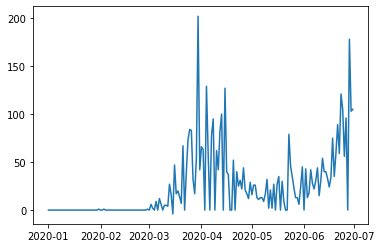

In [57]:
plt.plot(cases.loc[index].fillna(0))

In [58]:
plt.plot(dataset.fillna(0)[11].groupby(level= 0).agg('max'))
#dataset.fillna(0).groupby(level = 0).sum()

NameError: name 'dataset' is not defined

In [59]:
dataset.shape

NameError: name 'dataset' is not defined

In [60]:
import pandas as pd
from time import time

start = time()
joined = pd.read_hdf('traffic_covid.hdf','table')
end = time()

print("Time taken %f"%(end-start))

HDF5ExtError: HDF5 error back trace

  File "H5F.c", line 509, in H5Fopen
    unable to open file
  File "H5Fint.c", line 1400, in H5F__open
    unable to open file
  File "H5Fint.c", line 1709, in H5F_open
    unable to read root group
  File "H5Groot.c", line 239, in H5G_mkroot
    can't check if symbol table message exists
  File "H5Omessage.c", line 883, in H5O_msg_exists
    unable to protect object header
  File "H5Oint.c", line 1100, in H5O_protect
    unable to load object header
  File "H5AC.c", line 1625, in H5AC_protect
    H5C_protect() failed
  File "H5C.c", line 2362, in H5C_protect
    can't load entry
  File "H5C.c", line 6712, in H5C_load_entry
    incorrect metadatda checksum after all read attempts
  File "H5Ocache.c", line 219, in H5O__cache_get_final_load_size
    can't deserialize object header prefix
  File "H5Ocache.c", line 1231, in H5O__prefix_deserialize
    bad object header version number

End of HDF5 error back trace

Unable to open/create file 'traffic_covid.hdf'

In [7]:
joined.shape

(5, 16)

In [19]:
### Join datatable and cases based on key

In [85]:
#cases.index = cases.index.date
cases.index.rename('date')

Index([2020-01-01, 2020-01-02, 2020-01-03, 2020-01-04, 2020-01-05, 2020-01-06,
       2020-01-07, 2020-01-08, 2020-01-09, 2020-01-10,
       ...
       2021-04-22, 2021-04-23, 2021-04-24, 2021-04-25, 2021-04-26, 2021-04-27,
       2021-04-28, 2021-04-29, 2021-04-30, 2021-05-01],
      dtype='object', name='date', length=487)

In [9]:
timestamp_column = pd.Series(data_table.index)

NameError: name 'data_table' is not defined

In [10]:
data_table.index = data_table.index.date
data_table.index.rename('date',inplace = True)
timestamp_column.index = data_table.index

NameError: name 'data_table' is not defined

In [202]:
merged_df = data_table.join(cases)
merged_df['timestamp'] = timestamp_column

In [203]:
merged_df.head()

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409528,409529,413026,413845,413877,413878,414284,414694,1,timestamp
2020-01-01,71.9,68.2,67.0,67.5,68.2,68.4,66.8,67.8,66.7,72.4,...,67.5,67.0,71.9,68.6,69.9,67.2,71.0,67.2,None,2020-01-01 00:00:00
2020-01-01,71.7,68.0,66.7,68.4,68.0,68.1,66.3,67.1,66.9,71.6,...,67.2,66.8,72.0,68.2,68.9,66.0,70.3,67.0,None,2020-01-01 00:05:00
2020-01-01,71.7,68.0,67.2,68.3,68.0,68.2,66.5,67.1,66.6,72.3,...,67.1,66.5,72.2,68.8,69.2,66.6,70.3,67.5,None,2020-01-01 00:10:00
2020-01-01,71.8,67.8,67.4,67.4,67.8,68.0,67.0,67.6,66.2,71.2,...,66.9,66.8,72.0,68.7,69.4,66.5,70.9,67.6,None,2020-01-01 00:15:00
2020-01-01,71.6,67.9,66.4,67.3,67.9,67.7,66.6,67.4,66.2,71.3,...,67.3,66.8,72.1,67.3,69.7,66.7,70.7,67.1,None,2020-01-01 00:20:00


In [206]:
merged_df = merged_df.set_index('timestamp').rename(columns ={1:'covid_cases'})

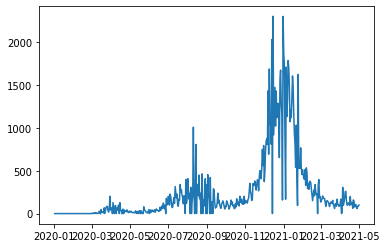

In [211]:
import matplotlib.pyplot as plt

plt.plot(cases)
plt.show()

### Start encoder work

In [63]:
cases

,1
2020-01-01,None
2020-01-02,0
2020-01-03,0
2020-01-04,0
2020-01-05,0
...,...
2021-04-27,71
2021-04-28,58
2021-04-29,87
2021-04-30,88


In [11]:
import pandas as pd

merged_df = pd.read_pickle('traffic_covid.pkl')

In [12]:
merged_df.head()

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409526,409528,409529,413026,413845,413877,413878,414284,414694,covid_cases
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,71.9,68.2,67.0,67.5,68.2,68.4,66.8,67.8,66.7,72.4,...,68.6,67.5,67.0,71.9,68.6,69.9,67.2,71.0,67.2,None
2020-01-01 00:05:00,71.7,68.0,66.7,68.4,68.0,68.1,66.3,67.1,66.9,71.6,...,68.2,67.2,66.8,72.0,68.2,68.9,66.0,70.3,67.0,None
2020-01-01 00:10:00,71.7,68.0,67.2,68.3,68.0,68.2,66.5,67.1,66.6,72.3,...,68.5,67.1,66.5,72.2,68.8,69.2,66.6,70.3,67.5,None
2020-01-01 00:15:00,71.8,67.8,67.4,67.4,67.8,68.0,67.0,67.6,66.2,71.2,...,68.4,66.9,66.8,72.0,68.7,69.4,66.5,70.9,67.6,None
2020-01-01 00:20:00,71.6,67.9,66.4,67.3,67.9,67.7,66.6,67.4,66.2,71.3,...,68.4,67.3,66.8,72.1,67.3,69.7,66.7,70.7,67.1,None


### Neural network training

In [220]:
cases = '''select record_date,new_cases from traffic_covid_both'''
cases = engine.execute(cases).fetchall()

import datetime
import pandas as pd

fromtime = datetime.datetime.strptime('01-01-2020','%m-%d-%Y')
cases = pd.DataFrame(cases)
cases[0] = pd.to_datetime(cases[0])
cases.set_index(0,inplace = True)

In [254]:
import torch
import torch.nn as nn

# Timestep information already encoded in this sequence (Sequence Length)

class CovidEncoder(nn.Module):
    def __init__(self, input_dim, hidden_size , **kwargs):
        super().__init__()
        self.cell = nn.GRU(input_size = input_dim,hidden_size= hidden_size)
        self.lin = nn.Linear(hidden_size,1)

    def forward(self, inputs, hidden_state):
        output, hidden = self.cell(inputs, hidden_state)
        return torch.nn.functional.leaky_relu(self.lin(output[-1,:,:]))

#Take in last weeks COVID data to predict at current timestep

In [222]:
cases = cases[cases.index <= '2020-06-29']
covid_cases = cases.fillna(0.).to_numpy().astype('float32')

In [62]:
import numpy as np

covid_horizon = 7

x = []
y = []

for i in range(covid_horizon,len(covid_cases)):
    x.append(covid_cases[i-covid_horizon:i])
    y.append(covid_cases[i])
    
x = np.array(x)
y = np.array(y)

In [63]:
x.shape

(174, 7, 1)

In [64]:
np.unique(x,axis = 0 ).shape

(130, 7, 1)

In [65]:
y.shape

(174, 1)

In [66]:
x = torch.tensor(x).permute(1,0,2)

batch_size = 110

train_x,train_y = x[:,:batch_size,:], y[:batch_size,:]

test_x,test_y = x[:,batch_size:,:],y[batch_size:,]

<ipython-input-11-6bfabbd9a0d8>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_x = torch.tensor(train_x)


Epoch number 0 loss value 19.021208
Epoch number 100 loss value 13.162189
Epoch number 200 loss value 8.779828
Epoch number 300 loss value 4.547822
Epoch number 400 loss value 2.636981
Epoch number 500 loss value 1.952946
Epoch number 600 loss value 1.547063
Epoch number 700 loss value 1.308218
Epoch number 800 loss value 1.157400
Epoch number 900 loss value 1.109256
Epoch number 1000 loss value 1.004866
Epoch number 1100 loss value 0.976264
Epoch number 1200 loss value 0.913545
Epoch number 1300 loss value 0.844217
Epoch number 1400 loss value 0.860111
Epoch number 1500 loss value 0.857304
Epoch number 1600 loss value 0.760932
Epoch number 1700 loss value 0.707987
Epoch number 1800 loss value 0.701628
Epoch number 1900 loss value 0.716160


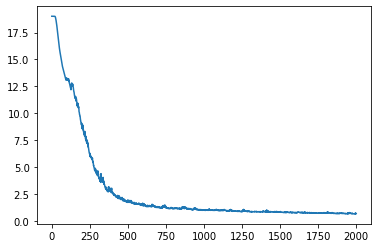

In [11]:
import torch.optim as optim
import matplotlib.pyplot as plt

epochs = 2000
input_dim = 1
hidden_size = 64

model = CovidEncoder(input_dim,hidden_size)
h_0 = torch.randn(1,batch_size,hidden_size)

train_x = torch.tensor(train_x)
train_y = torch.tensor(train_y)s

criterion = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

losses = []
print_every = 100

for epoch in range(epochs):
    
    optimizer.zero_grad()
    
    output = model(train_x,h_0)
    loss = criterion(train_y,output)
    
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if epoch % print_every == 0:
        print('Epoch number %d loss value %f'% (epoch,loss))

plt.plot(losses)
plt.show()

### Data Generation process

In [223]:
import pandas as pd

merged_df = pd.read_pickle('traffic_covid.pkl')

In [224]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import argparse
import numpy as np
import os
import pandas as pd


def generate_graph_seq2seq_io_data(
        df, x_offsets, y_offsets, add_time_in_day=True, add_day_in_week=False, scaler=None
):
    """
    Generate samples from
    :param df:
    :param x_offsets:
    :param y_offsets:
    :param add_time_in_day:
    :param add_day_in_week:
    :param scaler:
    :return:
    # x: (epoch_size, input_length, num_nodes, input_dim)
    # y: (epoch_size, output_length, num_nodes, output_dim)
    """

    num_samples, num_nodes = df.shape
    data = np.expand_dims(df.values, axis=-1)
    data_list = [data]
    if add_time_in_day:
        time_ind = (df.index.values - df.index.values.astype("datetime64[D]")) / np.timedelta64(1, "D")
        time_in_day = np.tile(time_ind, [1, num_nodes, 1]).transpose((2, 1, 0))
        data_list.append(time_in_day)
    if add_day_in_week:
        day_in_week = np.zeros(shape=(num_samples, num_nodes, 7))
        day_in_week[np.arange(num_samples), :, df.index.dayofweek] = 1
        data_list.append(day_in_week)

    data = np.concatenate(data_list, axis=-1)
    
    x, y = [], []
    
    min_t = abs(min(x_offsets))
    max_t = abs(num_samples - abs(max(y_offsets)))  # Exclusive
    for t in range(min_t, max_t):
        x_t = data[t + x_offsets, ...]
        y_t = data[t + y_offsets, ...]
        x.append(x_t)
        y.append(y_t)
    x = np.stack(x, axis=0)
    y = np.stack(y, axis=0)
    return x, y


def generate_train_val_test(args,df,covid_df):
    
    x_offsets = np.sort(
        # np.concatenate(([-week_size + 1, -day_size + 1], np.arange(-11, 1, 1)))
        np.concatenate((np.arange(-11, 1, 1),))
    )
    # Predict the next one hour
    y_offsets = np.sort(np.arange(1, 13, 1))
    # x: (num_samples, input_length, num_nodes, input_dim)
    # y: (num_samples, output_length, num_nodes, output_dim)
    x, y = generate_graph_seq2seq_io_data(
        df,
        x_offsets=x_offsets,
        y_offsets=y_offsets,
        add_time_in_day=True,
        add_day_in_week=False,
    )

    print("x shape: ", x.shape, ", y shape: ", y.shape)
    # Write the data into npz file.
    # num_test = 6831, using the last 6831 examples as testing.
    # for the rest: 7/8 is used for training, and 1/8 is used for validation.
    num_samples = x.shape[0]
    num_test = round(num_samples * 0.2)
    num_train = round(num_samples * 0.7)
    num_val = num_samples - num_test - num_train

    # train
    x_train, y_train = x[:num_train], y[:num_train]
    # val
    x_val, y_val = (
        x[num_train: num_train + num_val],
        y[num_train: num_train + num_val],
    )
    # test
    x_test, y_test = x[-num_test:], y[-num_test:]

    for cat in ["train", "val", "test"]:
        _x, _y = locals()["x_" + cat], locals()["y_" + cat]
        print(cat, "x: ", _x.shape, "y:", _y.shape)
        np.savez_compressed(
            os.path.join(args.output_dir, "%s.npz" % cat),
            x=_x,
            y=_y,
            x_offsets=x_offsets.reshape(list(x_offsets.shape) + [1]),
            y_offsets=y_offsets.reshape(list(y_offsets.shape) + [1]),
        )

In [225]:
df = merged_df
add_time_in_day = True
add_day_in_week = False

num_samples, num_nodes = df.shape
data = np.expand_dims(df.values, axis=-1)
data_list = [data]

if add_time_in_day:
    time_ind = (df.index.values - df.index.values.astype("datetime64[D]")) / np.timedelta64(1, "D")
    time_in_day = np.tile(time_ind, [1, num_nodes, 1]).transpose((2, 1, 0))
    data_list.append(time_in_day)
if add_day_in_week:
    day_in_week = np.zeros(shape=(num_samples, num_nodes, 7))
    day_in_week[np.arange(num_samples), :, df.index.dayofweek] = 1
    data_list.append(day_in_week)

data = np.concatenate(data_list, axis=-1)

In [226]:
merged_df['covid_cases'] = merged_df['covid_cases'].fillna(0.).astype('float64')

In [227]:
merged_df.head()

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409526,409528,409529,413026,413845,413877,413878,414284,414694,covid_cases
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,71.9,68.2,67.0,67.5,68.2,68.4,66.8,67.8,66.7,72.4,...,68.6,67.5,67.0,71.9,68.6,69.9,67.2,71.0,67.2,0.0
2020-01-01 00:05:00,71.7,68.0,66.7,68.4,68.0,68.1,66.3,67.1,66.9,71.6,...,68.2,67.2,66.8,72.0,68.2,68.9,66.0,70.3,67.0,0.0
2020-01-01 00:10:00,71.7,68.0,67.2,68.3,68.0,68.2,66.5,67.1,66.6,72.3,...,68.5,67.1,66.5,72.2,68.8,69.2,66.6,70.3,67.5,0.0
2020-01-01 00:15:00,71.8,67.8,67.4,67.4,67.8,68.0,67.0,67.6,66.2,71.2,...,68.4,66.9,66.8,72.0,68.7,69.4,66.5,70.9,67.6,0.0
2020-01-01 00:20:00,71.6,67.9,66.4,67.3,67.9,67.7,66.6,67.4,66.2,71.3,...,68.4,67.3,66.8,72.1,67.3,69.7,66.7,70.7,67.1,0.0


In [216]:
merged_df.shape

(52114, 321)

In [228]:
x_offsets = np.sort(np.concatenate((np.arange(-11, 1, 1),)))
y_offsets = np.sort(np.arange(1, 13, 1))

# x_offsets = x_offsets.reshape(list(x_offsets.shape) + [1])
# y_offsets = y_offsets.reshape(list(y_offsets.shape) + [1])

x = []
y = []

In [229]:
min_t = abs(min(x_offsets))
max_t = abs(num_samples - abs(max(y_offsets)))

for t in range(min_t, max_t):
    x_t = data[t + x_offsets, ...]
    y_t = data[t + y_offsets, ...]
    x.append(x_t)
    y.append(y_t)

x = np.stack(x, axis=0)
y = np.stack(y, axis=0)

In [230]:
x.shape

(52091, 12, 321, 2)

In [233]:
from datetime import datetime

def convert_to_date(ind):
    return datetime.strptime(str(merged_df.index[ind].date()), '%Y-%m-%d')

def return_case_index(ind):
    #print(convert_to_date(ind))
    return cases.index.get_loc(convert_to_date(ind))

def relu(arr):
    arr[arr < 0] = 0.
    return arr

ind = min_t - 12 + 1

In [235]:
cov_horizon = 7
#cases = cases.astype('float64').rolling(cov_horizon).mean().fillna(0.)

for ind in range(0,2):
    cind = return_case_index(ind)
    arr = relu(np.arange(cind-cov_horizon,cind))
    print(cases.values[arr])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [236]:
cases = np.round(cases)

In [237]:
min_t = abs(min(x_offsets))
max_t = abs(num_samples - abs(max(y_offsets)))

cov_x = []
cov_y = []

for t in range(min_t, max_t):
    #x_t = data[t + x_offsets, ...]
    #y_t = data[t + y_offsets, ...]
    try:
        cind = return_case_index(t)
        cov_x.append(cases.values[relu(np.arange(cind-cov_horizon,cind))])
        cov_y.append(cases.values[cind])
        #print(cases.values[relu(np.arange(cind-cov_horizon,cind))],cases.values[cind])
    except IndexError as e:
        print(relu(np.arange(t-cov_horizon,t)))
    #    x.append(x_t)
    #    y.append(y_t)

#x = np.stack(x, axis=0)
#y = np.stack(y, axis=0)

In [238]:
covid_cases = np.stack(cov_x,axis = 0).astype('float32')
covid_labels = np.stack(cov_y,axis = 0).astype('float32')

In [240]:
covid_cases.shape

(52091, 7, 1)

In [241]:
covid_labels.shape

(52091, 1)

In [31]:
#indices = np.unique(covid_cases,axis = 0,return_index = True)[1]
#covid_cases_uq = covid_cases[indices]
#covid_labels_uq = covid_labels[indices]

In [32]:
#covid_cases = torch.tensor(covid_cases).permute(1,0,2)

In [432]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

class CovidDataset(Dataset):
    def __init__(self,ds_size):
        self.dataset = covid_cases[:,:ds_size,:]
        self.labels = covid_labels[:ds_size,:]
        
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return self.dataset[:,0,:],self.labels[0,:]
    
class CovidTestDataset(Dataset):
    def __init__(self,ds_size):
        self.dataset = covid_cases[:,ds_size:,:]
        self.labels = covid_labels[ds_size:,:]
        
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return self.dataset[:,0,:],self.labels[0,:]

train = CovidDataset(42000)
test = CovidTestDataset(42000)

trainloader = DataLoader(train, batch_size=batch_size, shuffle=False,drop_last = True)
testloader = DataLoader(test, batch_size=batch_size, shuffle=False,drop_last = True)

In [33]:
type(torch.tensor(covid_cases[:40000]).permute(1,0,2))

torch.Tensor

In [34]:
### Our own dataloader that uses covid data

In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

cc = torch.tensor(covid_cases[:40000]).permute(1,0,2)#.to(device)
cl = torch.tensor(covid_labels[:40000])#.to(device)

cc_test = torch.tensor(covid_cases[40000:]).permute(1,0,2)#.to(device)
cl_test = torch.tensor(covid_labels[40000:])#.to(device)

def get_batch(batch_size,dataset = 'train'):
    if dataset == 'train':
        for i in range(0,len(cc),batch_size):
            x,y = cc[:,i:i+batch_size,:],cl[i:i+batch_size,:]
            if x.shape[1] == batch_size:
                yield x,y
    else:
        for i in range(0,len(cc_test),batch_size):
            x,y = cc_test[:,i:i+batch_size,:],cl_test[i:i+batch_size,:]
            if x.shape[1] == batch_size:
                yield x,y

In [36]:
torch.manual_seed(0)

epochs = 200
input_dim = 1
hidden_size = 64
batch_size = 16

Epoch number 0 loss value 0.006215
Epoch number 10 loss value 0.006034
Epoch number 20 loss value 0.005696
Epoch number 30 loss value 0.005322
Epoch number 40 loss value 0.004954
Epoch number 50 loss value 0.004604
Epoch number 60 loss value 0.004277
Epoch number 70 loss value 0.003973
Epoch number 80 loss value 0.003690
Epoch number 90 loss value 0.003427
Epoch number 100 loss value 0.003183
Epoch number 110 loss value 0.002956
Epoch number 120 loss value 0.002745
Epoch number 130 loss value 0.002549
Epoch number 140 loss value 0.002368
Epoch number 150 loss value 0.002199
Epoch number 160 loss value 0.002042
Epoch number 170 loss value 0.001897
Epoch number 180 loss value 0.001762
Epoch number 190 loss value 0.001636


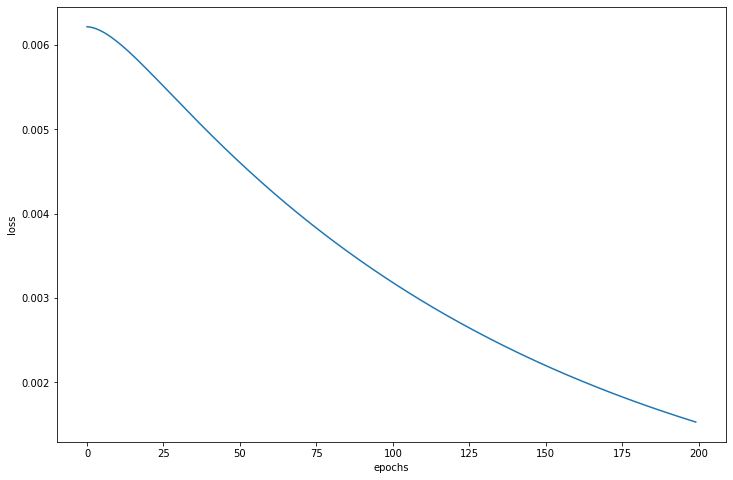

In [44]:
import torch.optim as optim
import matplotlib.pyplot as plt

model = CovidEncoder(input_dim,hidden_size)
#model.to(device)
model.train()

h_0 = torch.zeros(1,batch_size,hidden_size)#.to(device)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

losses = []
print_every = 10

# Mini Batch SGD

for epoch in range(epochs):
    batch_losses = []
    for train_x,train_y in get_batch(batch_size):        
        optimizer.zero_grad()
        
        output = model(train_x,h_0)

        loss = criterion(train_y,output)
        batch_losses.append(loss.detach())
        loss.backward()
        
        optimizer.step()      

    losses.append(torch.mean(torch.tensor(batch_losses)).item())
    
    if epoch % print_every == 0:
        print('Epoch number %d loss value %f'% (epoch,losses[-1]))

plt.figure(figsize = (12,8))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(losses)
plt.show()

In [38]:
# COVID encoder

In [49]:
model.eval()

outputs = []

with torch.no_grad():
    losses  = []
    for test_x,test_y in get_batch(batch_size,'test'):       
        out = model(test_x,h_0)
        outputs.append(out)
        loss = criterion(out,test_y)
        
        losses.append(loss)
        
    print('Loss %f'%(torch.mean(torch.stack(losses), dim=0)).item())

Loss 273.144043


In [50]:
outputs

[tensor([[0.0431],
         [0.0431],
         [0.0431],
         [0.0431],
         [0.0431],
         [0.0431],
         [0.0431],
         [0.0427],
         [0.0427],
         [0.0427],
         [0.0427],
         [0.0427],
         [0.0427],
         [0.0427],
         [0.0427],
         [0.0427]])]

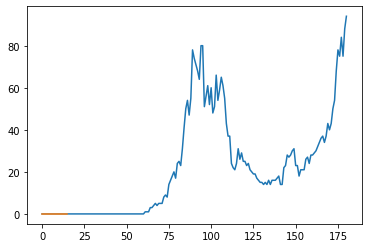

In [435]:
plt.plot(cases.values,label = 'truths')
plt.plot(np.stack(outputs,axis = 0).flatten(),label = 'preds')
plt.show()

### Generate COVID cases as 3rd column

In [29]:
import pandas as pd
merged_df = pd.read_pickle('traffic_covid.pkl')

merged_df['covid_cases'] = merged_df['covid_cases'].fillna(0.).astype('float64')

In [54]:
df

,400001,400017,400030,400040,400045,400052,400057,400059,400065,400069,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,71.9,68.2,67.0,67.5,68.2,68.4,66.8,67.8,66.7,72.4,...,69.0,68.6,67.5,67.0,71.9,68.6,69.9,67.2,71.0,67.2
2020-01-01 00:05:00,71.7,68.0,66.7,68.4,68.0,68.1,66.3,67.1,66.9,71.6,...,68.1,68.2,67.2,66.8,72.0,68.2,68.9,66.0,70.3,67.0
2020-01-01 00:10:00,71.7,68.0,67.2,68.3,68.0,68.2,66.5,67.1,66.6,72.3,...,68.6,68.5,67.1,66.5,72.2,68.8,69.2,66.6,70.3,67.5
2020-01-01 00:15:00,71.8,67.8,67.4,67.4,67.8,68.0,67.0,67.6,66.2,71.2,...,68.8,68.4,66.9,66.8,72.0,68.7,69.4,66.5,70.9,67.6
2020-01-01 00:20:00,71.6,67.9,66.4,67.3,67.9,67.7,66.6,67.4,66.2,71.3,...,68.8,68.4,67.3,66.8,72.1,67.3,69.7,66.7,70.7,67.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29 23:40:00,71.3,61.7,68.3,67.4,62.2,66.4,67.0,67.2,65.7,64.7,...,62.6,67.8,66.1,61.2,70.6,65.6,70.0,67.1,71.3,67.3
2020-06-29 23:45:00,71.5,61.8,67.4,67.1,62.5,66.0,65.6,67.4,65.6,64.2,...,64.0,67.8,65.8,61.4,70.3,66.7,69.8,66.9,71.2,66.6
2020-06-29 23:50:00,71.3,62.0,67.7,67.6,62.5,67.7,67.5,67.3,65.9,64.6,...,63.2,67.7,66.1,60.9,70.9,67.7,69.2,66.9,70.4,65.9


In [65]:
### cleaning and null value filling

merged_df['covid_cases'] = merged_df['covid_cases'].fillna(0.).astype('float64')
df = merged_df.drop('covid_cases',axis = 1)
horizon = 12
rolling_data = df.rolling(horizon,min_periods=1).mean()
rolling_data.fillna(rolling_data.mean(),inplace = True)
df = df.fillna(rolling_data[df.isnull()])

In [66]:
add_time_in_day = True
add_day_in_week = False
add_covid_cases = True

num_samples, num_nodes = df.shape
data = np.expand_dims(df.values, axis=-1)
data_list = [data]

if add_time_in_day:
    time_ind = (df.index.values - df.index.values.astype("datetime64[D]")) / np.timedelta64(1, "D")
    time_in_day = np.tile(time_ind, [1, num_nodes, 1]).transpose((2, 1, 0))
    data_list.append(time_in_day)
if add_day_in_week:
    day_in_week = np.zeros(shape=(num_samples, num_nodes, 7))
    day_in_week[np.arange(num_samples), :, df.index.dayofweek] = 1
    data_list.append(day_in_week)
if add_covid_cases:
    cas = merged_df['covid_cases'].values
    case_transposed = np.tile(cas,[1,num_nodes,1]).transpose(2,1,0)
    data_list.append(case_transposed)

data = np.concatenate(data_list, axis=-1)

In [68]:
!mkdir data

In [69]:
x_offsets = np.sort(
    # np.concatenate(([-week_size + 1, -day_size + 1], np.arange(-11, 1, 1)))
    np.concatenate((np.arange(-11, 1, 1),))
)
# Predict the next one hour
y_offsets = np.sort(np.arange(1, 13, 1))

x_offsets = x_offsets.reshape(list(x_offsets.shape) + [1])
y_offset = y_offsets.reshape(list(y_offsets.shape) + [1])

x, y = [], []
# t is the index of the last observation.
min_t = abs(min(x_offsets))
max_t = abs(num_samples - abs(max(y_offsets)))  # Exclusive
for t in range(min_t, max_t):
    x_t = data[t + x_offsets, ...]
    y_t = data[t + y_offsets, ...]
    x.append(x_t)
    y.append(y_t)

x = np.stack(x, axis=0)
y = np.stack(y, axis=0)

In [71]:
y.shape

(52091, 12, 320, 3)

In [72]:
num_samples = x.shape[0]
num_test = round(num_samples * 0.2)
num_train = round(num_samples * 0.7)
num_val = num_samples - num_test - num_train

# train
x_train, y_train = x[:num_train], y[:num_train]
# val
x_val, y_val = (
    x[num_train: num_train + num_val],
    y[num_train: num_train + num_val],
)
# test
x_test, y_test = x[-num_test:], y[-num_test:]

for cat in ["train", "val", "test"]:
    _x, _y = locals()["x_" + cat], locals()["y_" + cat]
    print(cat, "x: ", _x.shape, "y:", _y.shape)
    np.savez_compressed(
        os.path.join('data', "%s.npz" % cat),
        x=_x,
        y=_y,
        x_offsets=x_offsets.reshape(list(x_offsets.shape) + [1]),
        y_offsets=y_offsets.reshape(list(y_offsets.shape) + [1]),
    )

train x:  (36464, 12, 320, 3) y: (36464, 12, 320, 3)
val x:  (5209, 12, 320, 3) y: (5209, 12, 320, 3)
test x:  (10418, 12, 320, 3) y: (10418, 12, 320, 3)


### Does the encoder train well for atleast the existing COVID data?

In [252]:
import numpy as np

covid = cases.fillna(0.).to_numpy().astype('float32')

covid_horizon = 7

x = []
y = []

for i in range(covid_horizon,len(covid)):
    x.append(covid[i-covid_horizon:i])
    y.append(covid[i])
    
x = np.array(x)
y = np.array(y)

x = torch.tensor(x).permute(1,0,2)

batch_size = 110

train_x,train_y = x[:,:batch_size,:], y[:batch_size,:]

test_x,test_y = x[:,batch_size:,:],y[batch_size:,]

<ipython-input-255-de21ad3cf567>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_x = torch.tensor(train_x)
<ipython-input-255-de21ad3cf567>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_y = torch.tensor(train_y)


Epoch number 0 loss value 15.172659
Epoch number 100 loss value 2.666967
Epoch number 200 loss value 1.302647
Epoch number 300 loss value 0.942962
Epoch number 400 loss value 1.247177
Epoch number 500 loss value 1.081029
Epoch number 600 loss value 0.994971
Epoch number 700 loss value 0.978169
Epoch number 800 loss value 0.917874
Epoch number 900 loss value 0.902528
Epoch number 1000 loss value 0.875159
Epoch number 1100 loss value 0.861923
Epoch number 1200 loss value 0.897234
Epoch number 1300 loss value 0.802441
Epoch number 1400 loss value 0.801855
Epoch number 1500 loss value 0.811367
Epoch number 1600 loss value 0.779042
Epoch number 1700 loss value 0.782434
Epoch number 1800 loss value 0.786325
Epoch number 1900 loss value 0.769852


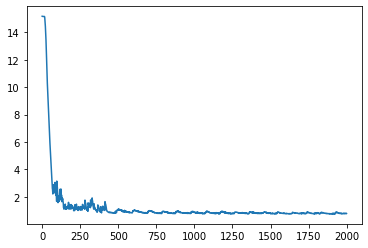

In [255]:
import torch.optim as optim
import matplotlib.pyplot as plt

epochs = 2000
input_dim = 1
hidden_size = 64

model = CovidEncoder(input_dim,hidden_size)
model.train()

#h_0 = torch.randn(1,batch_size,hidden_size)
h_0 = torch.zeros(1,batch_size,hidden_size)

train_x = torch.tensor(train_x)
train_y = torch.tensor(train_y)

criterion = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

losses = []
print_every = 100

for epoch in range(epochs):
    
    optimizer.zero_grad()
    
    output = model(train_x,h_0)
    loss = criterion(train_y,output)
    
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if epoch % print_every == 0:
        print('Epoch number %d loss value %f'% (epoch,loss))

plt.plot(losses)
plt.show()

In [256]:
test_x.shape

torch.Size([7, 64, 1])

In [257]:
test_y.shape

(64, 1)

In [258]:
model.eval()

h_0 = torch.zeros(1,batch_size,hidden_size)

with torch.no_grad():
    losses  = []
    
    out = model(train_x,h_0)
    
    loss = criterion(out,train_y)
        
    print('Loss %f'%(loss.detach().item()))

Loss 0.810439


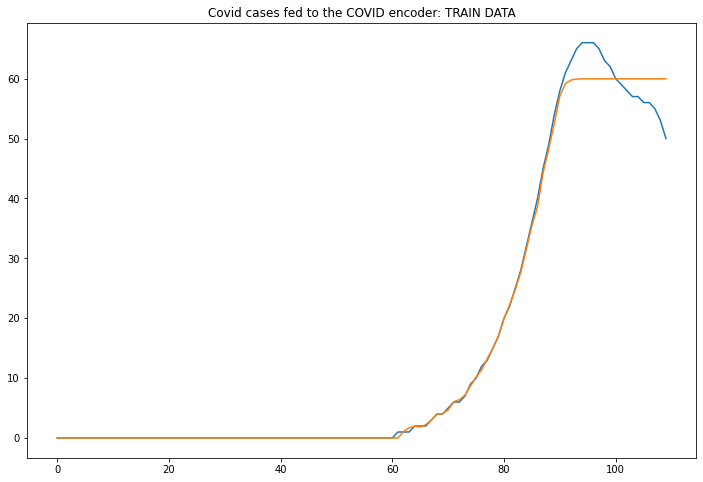

In [259]:
plt.figure(figsize =(12,8))
plt.title('Covid cases fed to the COVID encoder: TRAIN DATA')
plt.plot(train_y,label = 'true predictions (Training data)')
plt.plot(out,label = 'predicted values (Training data)')
plt.show()

In [192]:
model.eval()
criterion.eval()

h_0 = torch.zeros(1,64,hidden_size)

with torch.no_grad():
    out = model(test_x,h_0)
    loss = criterion(out,torch.tensor(test_y))
    print('Loss %f'%(loss))

Loss 34.574177


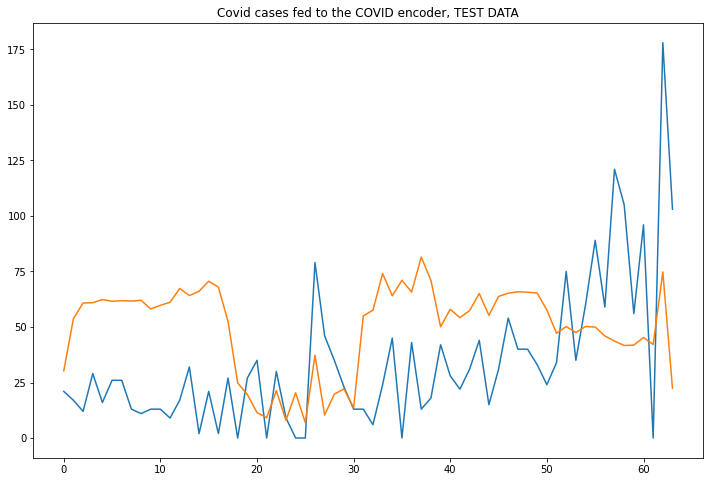

In [193]:
plt.figure(figsize =(12,8))
plt.title('Covid cases fed to the COVID encoder, TEST DATA')
plt.plot(test_y,label = 'true predictions (Test data)')
plt.plot(out,label = 'predicted values (Test data)')
plt.show()

### Testing repeated COVID cases data

In [209]:
import pandas as pd

merged_df = pd.read_pickle('traffic_covid.pkl')

In [ ]:
merged_df['covid_cases'] = merged_df['covid_cases'].fillna(0.).astype('float64')
df = merged_df.drop('covid_cases',axis = 1)
horizon = 12
rolling_data = df.rolling(horizon,min_periods=1).mean()
rolling_data.fillna(rolling_data.mean(),inplace = True)
df = df.fillna(rolling_data[df.isnull()])


In [242]:
covid_cases.shape

(52091, 7, 1)

In [244]:
covid_labels.shape

(52091, 1)

In [245]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

cc = torch.tensor(covid_cases[:40000]).permute(1,0,2)#.to(device)
cl = torch.tensor(covid_labels[:40000])#.to(device)

cc_test = torch.tensor(covid_cases[40000:]).permute(1,0,2)#.to(device)
cl_test = torch.tensor(covid_labels[40000:])#.to(device)

def get_batch(batch_size,dataset = 'train'):
    if dataset == 'train':
        for i in range(0,len(cc),batch_size):
            x,y = cc[:,i:i+batch_size,:],cl[i:i+batch_size,:]
            if x.shape[1] == batch_size:   # Equivalent to drop last
                yield x,y
    else:
        for i in range(0,len(cc_test),batch_size):
            x,y = cc_test[:,i:i+batch_size,:],cl_test[i:i+batch_size,:]
            if x.shape[1] == batch_size:   # Equivalent to drop last
                yield x,y